In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

# Loading of data file

In [2]:
feat_file=pd.read_csv('cancer_preprocess.csv')

In [3]:
feat_file.head()

,A1_0,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,...,E5_118,E5_119,E5_120,E5_121,E5_122,E5_123,E5_124,E5_125,E5_126,E5_127
0,0.183793,0.239916,0.850030,0.210690,0.896150,0.866617,0.860076,0.115359,0.374133,0.927302,...,0.793461,0.576311,0.189772,0.784201,0.335585,0.644900,0.301631,0.547792,0.479534,0.308149
1,0.908285,0.882967,0.804499,0.167710,0.854424,0.773797,0.818178,0.146237,0.822128,0.880442,...,0.792318,0.645596,0.668128,0.267654,0.732278,0.791278,0.680896,0.315371,0.368137,0.192646
2,0.187789,0.896291,0.089300,0.872091,0.140625,0.809294,0.833710,0.439762,0.836772,0.120445,...,0.594850,0.744443,0.246511,0.767050,0.736697,0.710731,0.586913,0.777560,0.706049,0.311375
3,0.911319,0.907869,0.831656,0.767504,0.886981,0.589135,0.704022,0.613958,0.852084,0.481431,...,0.593676,0.227899,0.264702,0.535805,0.480239,0.731689,0.799642,0.856727,0.824530,0.582091
4,0.181163,0.800212,0.827693,0.149731,0.739144,0.843704,0.841885,0.127548,0.112236,0.898438,...,0.391759,0.808125,0.147298,0.859803,0.620034,0.734427,0.126441,0.508898,0.552177,0.360427


In [4]:
feat_file.shape

(2129, 3200)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 3200)

In [10]:
y_train.shape

(1703,)

In [11]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
import pickle
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from keras.models import Sequential, Model
from keras import optimizers, regularizers, initializers
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

2023-04-24 22:42:29.605506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 22:42:33.451121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
import numpy as np
import time
import random
import os

from sklearn.preprocessing import normalize 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

import matplotlib.pyplot as plt
from matplotlib import gridspec

from activeSVC import min_complexity, min_acquisition,min_complexity_cv, min_acquisition_cv,min_complexity_h5py, min_acquisition_h5py
import pandas as pd
import pickle
import os, psutil

In [13]:
def text_create(path, name, msg):
    full_path = path + "/" + name + '.pickle'
    f=open(full_path,'wb') 
    pickle.dump(msg,f)
    f.close()

class TimerError(Exception):
     """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Total run time: {elapsed_time:0.4f} seconds")
        return elapsed_time

In [14]:
num_features =237
num_samples=100
init_samples=200

if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, samples_global, train_errors,test_errors,train_scores,test_scores,step_times= min_acquisition(
       X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples, init_samples=init_samples)
    elapsed_time=t.stop()

Elapsed time: 3.5753 seconds
feature 0 : gene [2965]  200 samples
training error=0.39459776864357016 test error=0.3967136150234742
training accuracy=0.6054022313564298 test accuracy=0.6032863849765259
Elapsed time: 4.0351 seconds
feature 1 : gene 3063  235 samples
training error=0.4004697592483852 test error=0.40375586854460094
training accuracy=0.5995302407516148 test accuracy=0.596244131455399
Elapsed time: 4.3350 seconds
feature 2 : gene 1318  241 samples
training error=0.35819142689371697 test error=0.3685446009389671
training accuracy=0.641808573106283 test accuracy=0.6314553990610329
Elapsed time: 4.7217 seconds
feature 3 : gene 1385  251 samples
training error=0.3382266588373459 test error=0.3873239436619718
training accuracy=0.6617733411626542 test accuracy=0.6126760563380281
Elapsed time: 4.5385 seconds
feature 4 : gene 2651  259 samples
training error=0.3435114503816794 test error=0.3615023474178404
training accuracy=0.6564885496183206 test accuracy=0.6384976525821596
Elapsed

Elapsed time: 4.1138 seconds
feature 42 : gene 1560  316 samples
training error=0.2982971227246036 test error=0.3380281690140845
training accuracy=0.7017028772753964 test accuracy=0.6619718309859155
Elapsed time: 4.2072 seconds
feature 43 : gene 1064  316 samples
training error=0.29653552554315915 test error=0.3380281690140845
training accuracy=0.7034644744568409 test accuracy=0.6619718309859155
Elapsed time: 4.0341 seconds
feature 44 : gene 2051  316 samples
training error=0.2959483264826776 test error=0.32629107981220656
training accuracy=0.7040516735173223 test accuracy=0.6737089201877934
Elapsed time: 3.7916 seconds
feature 45 : gene 1808  316 samples
training error=0.29712272460364064 test error=0.32629107981220656
training accuracy=0.7028772753963594 test accuracy=0.6737089201877934
Elapsed time: 3.9475 seconds
feature 46 : gene 1105  316 samples
training error=0.30005871990604815 test error=0.33098591549295775
training accuracy=0.6999412800939518 test accuracy=0.6690140845070423

Elapsed time: 8.8874 seconds
feature 84 : gene 2563  348 samples
training error=0.2601291837933059 test error=0.3685446009389671
training accuracy=0.739870816206694 test accuracy=0.6314553990610329
Elapsed time: 9.2332 seconds
feature 85 : gene 2388  348 samples
training error=0.26189078097475044 test error=0.3591549295774648
training accuracy=0.7381092190252495 test accuracy=0.6408450704225352
Elapsed time: 8.6245 seconds
feature 86 : gene 249  352 samples
training error=0.2560187903699354 test error=0.3568075117370892
training accuracy=0.7439812096300646 test accuracy=0.6431924882629108
Elapsed time: 9.0481 seconds
feature 87 : gene 2203  354 samples
training error=0.25778038755137994 test error=0.3568075117370892
training accuracy=0.7422196124486201 test accuracy=0.6431924882629108
Elapsed time: 8.9721 seconds
feature 88 : gene 1869  354 samples
training error=0.25778038755137994 test error=0.3591549295774648
training accuracy=0.7422196124486201 test accuracy=0.6408450704225352
Elap

Elapsed time: 11.0311 seconds
feature 125 : gene 184  364 samples
training error=0.2501467997651204 test error=0.36619718309859156
training accuracy=0.7498532002348797 test accuracy=0.6338028169014085
Elapsed time: 10.9553 seconds
feature 126 : gene 915  364 samples
training error=0.24544920728126834 test error=0.3591549295774648
training accuracy=0.7545507927187316 test accuracy=0.6408450704225352
Elapsed time: 11.0719 seconds
feature 127 : gene 1420  364 samples
training error=0.24603640634174986 test error=0.3615023474178404
training accuracy=0.7539635936582502 test accuracy=0.6384976525821596
Elapsed time: 11.4776 seconds
feature 128 : gene 2109  364 samples
training error=0.24721080446271285 test error=0.3615023474178404
training accuracy=0.7527891955372872 test accuracy=0.6384976525821596
Elapsed time: 11.1283 seconds
feature 129 : gene 2146  364 samples
training error=0.24603640634174986 test error=0.36384976525821594
training accuracy=0.7539635936582502 test accuracy=0.63615023

Elapsed time: 13.7841 seconds
feature 166 : gene 543  378 samples
training error=0.22665883734586026 test error=0.3591549295774648
training accuracy=0.7733411626541398 test accuracy=0.6408450704225352
Elapsed time: 13.4463 seconds
feature 167 : gene 607  378 samples
training error=0.22900763358778625 test error=0.3591549295774648
training accuracy=0.7709923664122137 test accuracy=0.6408450704225352
Elapsed time: 14.2362 seconds
feature 168 : gene 603  378 samples
training error=0.22842043452730476 test error=0.3568075117370892
training accuracy=0.7715795654726952 test accuracy=0.6431924882629108
Elapsed time: 14.0353 seconds
feature 169 : gene 1357  378 samples
training error=0.22724603640634175 test error=0.3544600938967136
training accuracy=0.7727539635936582 test accuracy=0.6455399061032864
Elapsed time: 13.8053 seconds
feature 170 : gene 1699  378 samples
training error=0.22724603640634175 test error=0.3591549295774648
training accuracy=0.7727539635936582 test accuracy=0.6408450704

Elapsed time: 16.6221 seconds
feature 207 : gene 2239  387 samples
training error=0.21491485613623018 test error=0.352112676056338
training accuracy=0.7850851438637698 test accuracy=0.647887323943662
Elapsed time: 19.4964 seconds
feature 208 : gene 575  387 samples
training error=0.21256605989430416 test error=0.3544600938967136
training accuracy=0.7874339401056958 test accuracy=0.6455399061032864
Elapsed time: 20.5938 seconds
feature 209 : gene 889  387 samples
training error=0.21256605989430416 test error=0.3544600938967136
training accuracy=0.7874339401056958 test accuracy=0.6455399061032864
Elapsed time: 17.1705 seconds
feature 210 : gene 2627  387 samples
training error=0.21256605989430416 test error=0.34976525821596244
training accuracy=0.7874339401056958 test accuracy=0.6502347417840375
Elapsed time: 17.1961 seconds
feature 211 : gene 2655  387 samples
training error=0.21197886083382267 test error=0.3474178403755869
training accuracy=0.7880211391661773 test accuracy=0.6525821596

In [15]:
feature_selected


[2965,
 3063,
 1318,
 1385,
 2651,
 929,
 2721,
 631,
 1459,
 740,
 2913,
 2108,
 2587,
 1124,
 2796,
 2397,
 255,
 187,
 2972,
 974,
 3066,
 3151,
 995,
 976,
 1547,
 990,
 3028,
 1008,
 1526,
 2607,
 2224,
 1291,
 2819,
 803,
 913,
 2159,
 752,
 2573,
 180,
 3139,
 1605,
 2550,
 1560,
 1064,
 2051,
 1808,
 1105,
 923,
 1013,
 1873,
 798,
 2161,
 2536,
 647,
 2060,
 559,
 1571,
 1073,
 2590,
 2976,
 2643,
 728,
 1220,
 1107,
 884,
 2062,
 204,
 2792,
 1355,
 1982,
 1184,
 2622,
 2981,
 133,
 1841,
 1278,
 2211,
 245,
 1936,
 3048,
 554,
 3031,
 2053,
 683,
 2563,
 2388,
 249,
 2203,
 1869,
 2462,
 2842,
 964,
 86,
 1123,
 1498,
 1683,
 644,
 3104,
 1185,
 971,
 281,
 2018,
 1191,
 2664,
 2793,
 3172,
 89,
 540,
 210,
 1012,
 8,
 2354,
 1649,
 2700,
 1029,
 3026,
 2247,
 1718,
 16,
 837,
 1774,
 1860,
 2149,
 1690,
 969,
 184,
 915,
 1420,
 2109,
 2146,
 2269,
 1277,
 179,
 2083,
 673,
 1520,
 991,
 2063,
 2054,
 925,
 2497,
 3044,
 1962,
 615,
 72,
 193,
 512,
 506,
 2223,
 2487,
 177

In [16]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [17]:
train_x.columns=feat_file.columns

In [18]:
test_x.columns=feat_file.columns

In [19]:
selected_feat_names = list(feat_file.columns[feature_selected])

In [20]:
selected_feat_names

['E4_21',
 'E4_119',
 'C1_38',
 'C1_105',
 'E1_91',
 'B3_33',
 'E2_33',
 'A5_119',
 'C2_51',
 'B1_100',
 'E3_97',
 'D2_60',
 'E1_27',
 'B4_100',
 'E2_108',
 'D4_93',
 'A2_127',
 'A2_59',
 'E4_28',
 'B3_78',
 'E4_122',
 'E5_79',
 'B3_99',
 'B3_80',
 'C3_11',
 'B3_94',
 'E4_84',
 'B3_112',
 'C2_118',
 'E1_47',
 'D3_48',
 'C1_11',
 'E3_3',
 'B2_35',
 'B3_17',
 'D2_111',
 'B1_112',
 'E1_13',
 'A2_52',
 'E5_67',
 'C3_69',
 'D5_118',
 'C3_24',
 'B4_40',
 'D2_3',
 'C5_16',
 'B4_81',
 'B3_27',
 'B3_117',
 'C5_81',
 'B2_30',
 'D2_113',
 'D5_104',
 'B1_7',
 'D2_12',
 'A5_47',
 'C3_35',
 'B4_49',
 'E1_30',
 'E4_32',
 'E1_83',
 'B1_88',
 'B5_68',
 'B4_83',
 'B2_116',
 'D2_14',
 'A2_76',
 'E2_104',
 'C1_75',
 'D1_62',
 'B5_32',
 'E1_62',
 'E4_37',
 'A2_5',
 'C5_49',
 'B5_126',
 'D3_35',
 'A2_117',
 'D1_16',
 'E4_104',
 'A5_42',
 'E4_87',
 'D2_5',
 'B1_43',
 'E1_3',
 'D4_84',
 'A2_121',
 'D3_27',
 'C5_77',
 'D5_30',
 'E3_26',
 'B3_68',
 'A1_86',
 'B4_99',
 'C2_90',
 'C4_19',
 'B1_4',
 'E5_32',
 'B5_

In [21]:
new_df=train_x.loc[:,selected_feat_names]
new_test=test_x.loc[:,selected_feat_names]

In [22]:
new_df.to_csv('activesvm_train_signaturizer.csv',index=False)
new_test.to_csv('activesvm_test_signaturizer.csv',index=False)

In [23]:
X_test_filtered=new_test
X_train_filtered=new_df

In [25]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [26]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_train_filtered)
y_pred = km.labels_

In [27]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_filtered,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

In [28]:
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})

In [29]:
data

,Clustering_scores,Scores
0,silhouette_score,0.009222
1,adjusted_rand_score,0.016835
2,normalized_mutual_info_score,0.013002


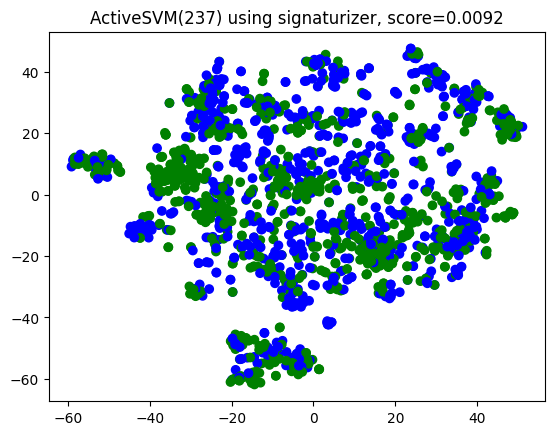

In [30]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train_filtered)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

#plt.legend()

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('ActiveSVM(237) using signaturizer, score=0.0092')
plt.show()

## RFC

In [31]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values_train=forest.predict_proba(X_train_filtered)
y_prediction_values_test=forest.predict_proba(X_test_filtered)

In [32]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[135  64]
 [ 67 160]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6683    0.6784    0.6733       199
           1     0.7143    0.7048    0.7095       227

    accuracy                         0.6925       426
   macro avg     0.6913    0.6916    0.6914       426
weighted avg     0.6928    0.6925    0.6926       426



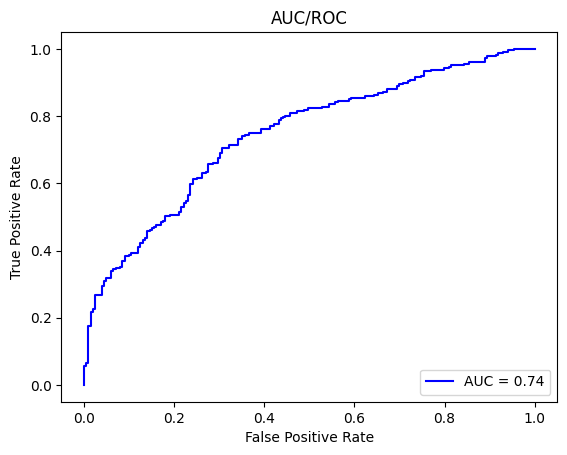

In [33]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)


y_prediction_values_train=KNN.predict_proba(X_train_filtered)
y_prediction_values_test=KNN.predict_proba(X_test_filtered)


In [35]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[131  68]
 [ 69 158]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6550    0.6583    0.6566       199
           1     0.6991    0.6960    0.6976       227

    accuracy                         0.6784       426
   macro avg     0.6771    0.6772    0.6771       426
weighted avg     0.6785    0.6784    0.6785       426



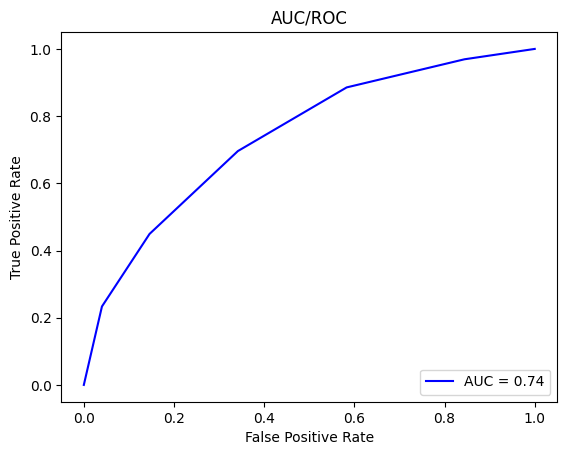

In [36]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [37]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)

y_prediction_values_train=model.predict_proba(X_train_filtered)
y_prediction_values_test=model.predict_proba(X_test_filtered)

In [38]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[129  70]
 [ 63 164]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6719    0.6482    0.6598       199
           1     0.7009    0.7225    0.7115       227

    accuracy                         0.6878       426
   macro avg     0.6864    0.6854    0.6857       426
weighted avg     0.6873    0.6878    0.6874       426



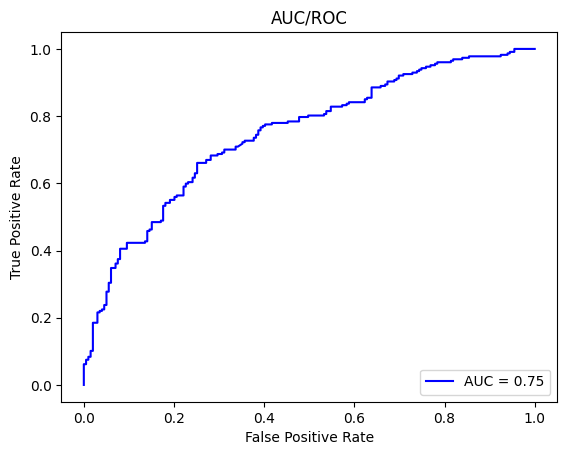

In [39]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)

y_prediction_values_train=lr.predict_proba(X_train_filtered)
y_prediction_values_test=lr.predict_proba(X_test_filtered)                                     

In [41]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[128  71]
 [ 78 149]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6214    0.6432    0.6321       199
           1     0.6773    0.6564    0.6667       227

    accuracy                         0.6502       426
   macro avg     0.6493    0.6498    0.6494       426
weighted avg     0.6512    0.6502    0.6505       426



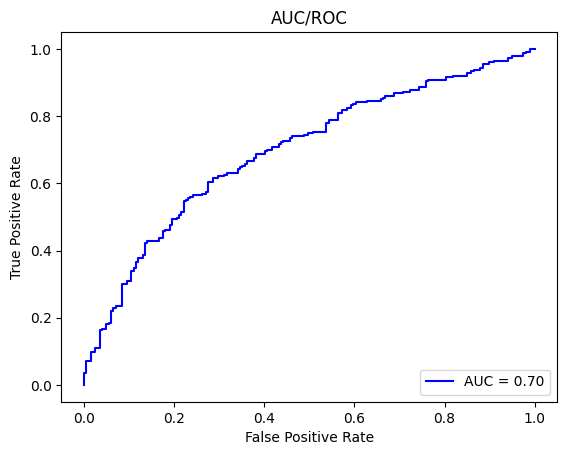

In [42]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values_train=xgb.predict_proba(X_train_filtered)
y_prediction_values_test=xgb.predict_proba(X_test_filtered)

[11:14:38] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [44]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)

xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)



xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[134  65]
 [ 68 159]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6634    0.6734    0.6683       199
           1     0.7098    0.7004    0.7051       227

    accuracy                         0.6878       426
   macro avg     0.6866    0.6869    0.6867       426
weighted avg     0.6881    0.6878    0.6879       426



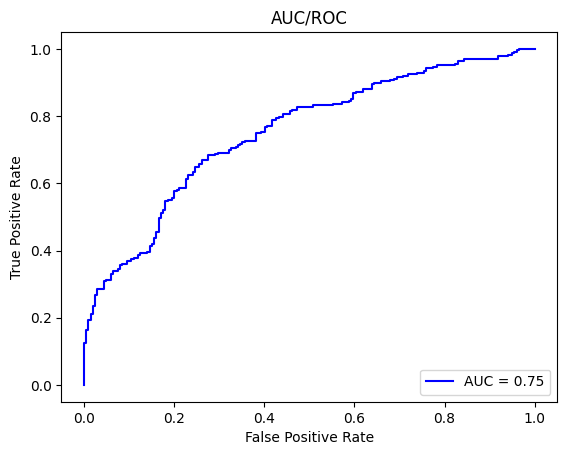

In [45]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [46]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values_train=clf.predict_proba(X_train_filtered)
y_prediction_values_test=clf.predict_proba(X_test_filtered)

In [47]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[113  86]
 [ 67 160]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6278    0.5678    0.5963       199
           1     0.6504    0.7048    0.6765       227

    accuracy                         0.6408       426
   macro avg     0.6391    0.6363    0.6364       426
weighted avg     0.6398    0.6408    0.6391       426



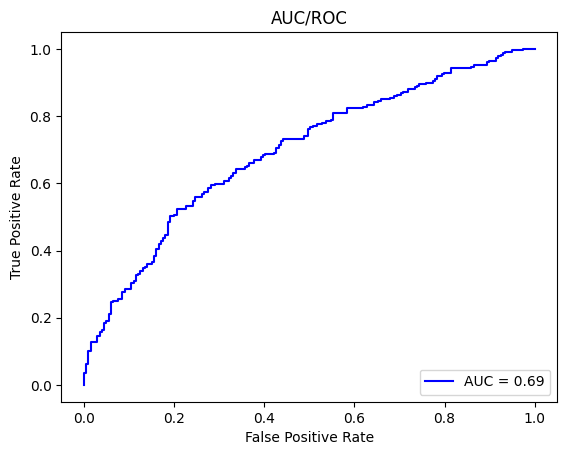

In [48]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values_train=mlp.predict_proba(X_train_filtered)
y_prediction_values_test=mlp.predict_proba(X_test_filtered)

In [50]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)

mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[141  58]
 [ 74 153]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6558    0.7085    0.6812       199
           1     0.7251    0.6740    0.6986       227

    accuracy                         0.6901       426
   macro avg     0.6905    0.6913    0.6899       426
weighted avg     0.6927    0.6901    0.6905       426



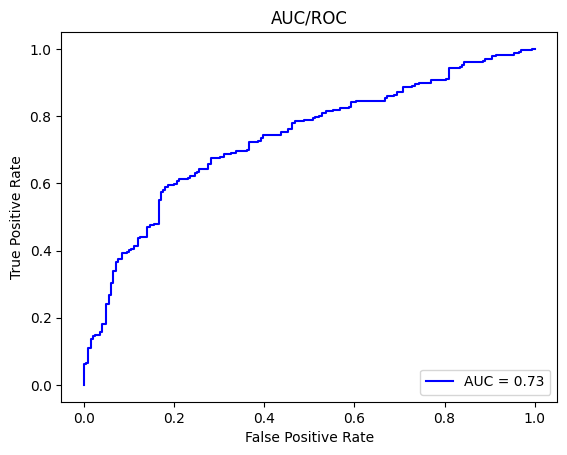

In [51]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values_train=etc.predict_proba(X_train_filtered)
y_prediction_values_test=etc.predict_proba(X_test_filtered)

In [53]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[135  64]
 [ 74 153]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6459    0.6784    0.6618       199
           1     0.7051    0.6740    0.6892       227

    accuracy                         0.6761       426
   macro avg     0.6755    0.6762    0.6755       426
weighted avg     0.6774    0.6761    0.6764       426



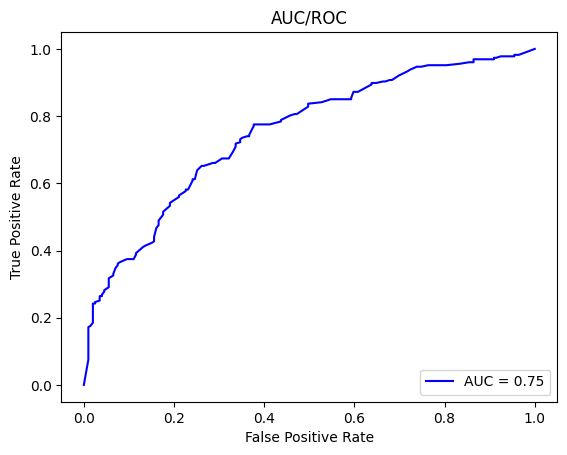

In [54]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [55]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)

y_prediction_values_train=dtc.predict_proba(X_train_filtered)
y_prediction_values_test=dtc.predict_proba(X_test_filtered)                           

In [56]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)

dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[109  90]
 [ 62 165]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6374    0.5477    0.5892       199
           1     0.6471    0.7269    0.6846       227

    accuracy                         0.6432       426
   macro avg     0.6422    0.6373    0.6369       426
weighted avg     0.6426    0.6432    0.6401       426



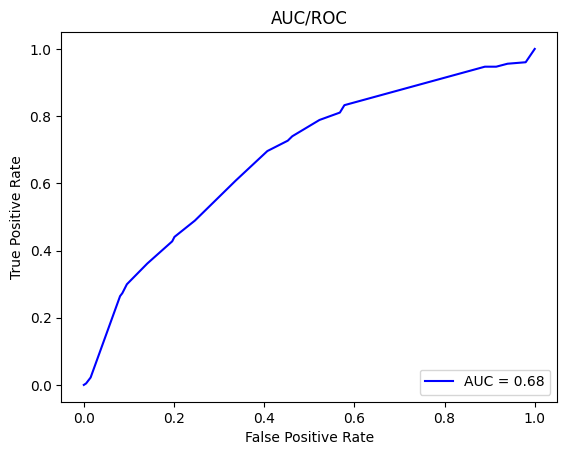

In [57]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)

y_prediction_values_train=lda.predict_proba(X_train_filtered)
y_prediction_values_test=lda.predict_proba(X_test_filtered)
                                                        

In [59]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[121  78]
 [ 75 152]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6173    0.6080    0.6127       199
           1     0.6609    0.6696    0.6652       227

    accuracy                         0.6408       426
   macro avg     0.6391    0.6388    0.6389       426
weighted avg     0.6405    0.6408    0.6407       426



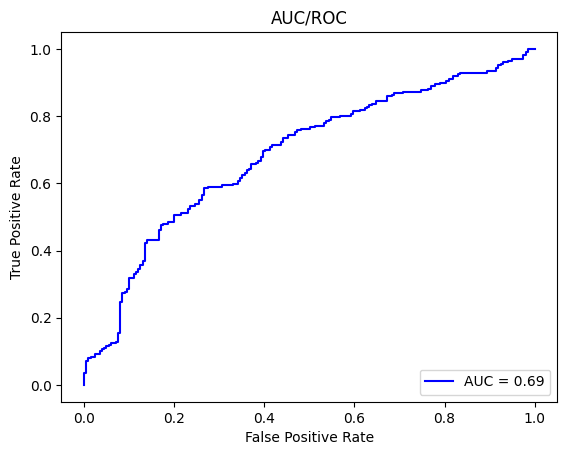

In [60]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [61]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [62]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}
             
df_test = pd.DataFrame(data_test)             

In [63]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,84.145625,0.682580,0.841196,0.839106,0.856328,0.682427,0.934031
1,KNN,79.271873,0.584954,0.792444,0.795045,0.805017,0.584905,0.876412
2,SVC,86.905461,0.738292,0.868688,0.856987,0.895097,0.737514,0.948083
3,LR,78.567234,0.570894,0.785440,0.790249,0.794755,0.570884,0.874401
4,XGB,99.706400,0.994128,0.997061,0.995455,0.998860,0.994122,0.999979
5,GNB,65.237816,0.303955,0.649321,0.644670,0.724059,0.301477,0.710960
6,MLP,99.647681,0.992951,0.996474,0.997714,0.995439,0.992948,0.999974
7,ETC,99.706400,0.994124,0.997061,0.997717,0.996579,0.994123,0.999979
8,DTC,77.216676,0.544581,0.771049,0.758730,0.817560,0.542830,0.844588
9,LDA,78.449794,0.568478,0.784193,0.786517,0.798176,0.568412,0.874622


In [64]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,69.248826,0.382920,0.691426,0.714286,0.704846,0.382882,0.743010
1,KNN,67.840376,0.354221,0.677107,0.699115,0.696035,0.354217,0.739380
2,SVC,68.779343,0.371718,0.685672,0.700855,0.722467,0.371514,0.746508
3,LR,65.023474,0.299117,0.649383,0.677273,0.656388,0.298955,0.695637
4,XGB,68.779343,0.373497,0.686714,0.709821,0.700441,0.373460,0.750825
5,GNB,64.084507,0.275421,0.636419,0.650407,0.704846,0.274300,0.694641
6,MLP,69.014085,0.381741,0.689895,0.725118,0.674009,0.380664,0.732783
7,ETC,67.605634,0.351701,0.675477,0.705069,0.674009,0.351312,0.749275
8,DTC,64.319249,0.279505,0.636918,0.647059,0.726872,0.277015,0.682366
9,LDA,64.084507,0.277930,0.638933,0.660870,0.669604,0.277902,0.685232
